## Task 2- Titanic Survival Prediction

Make a system which tells whether the person will be
save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.

## Dataset Overview
The Titanic dataset is a historical dataset containing information about the passengers aboard the RMS Titanic, which famously sank on its maiden voyage in 1912. This dataset has been widely used in machine learning and data analysis projects due to its rich set of variables and its relevance in understanding factors that influenced survival rates.

There are three datasets namely

train.csv
test.csv
gender_submission.csv
The dataset consists of the following columns:

PassengerId: A unique identifier for each passenger.
Survived: An indicator variable (0 or 1) representing whether the passenger survived or not. This is the target variable that we aim to predict.
Pclass: The passenger's ticket class (1st, 2nd, or 3rd class).
Name: The name of the passenger.
Sex: The gender of the passenger (male or female).
Age: The age of the passenger in years. It can be a fractional value for infants.
SibSp: The number of siblings/spouses aboard the Titanic.
Parch: The number of parents/children aboard the Titanic.
Ticket: The ticket number of the passenger.
Fare: The fare paid by the passenger for the ticket.
Cabin: The cabin number occupied by the passenger.
Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

## Loading the dataset

In [2]:
train_data= pd.read_csv(r"C:\Users\Admin\Downloads\Bharat Intern\Task 2 - Survived\train.csv")
test_data = pd.read_csv(r"C:\Users\Admin\Downloads\Bharat Intern\Task 2 - Survived\test.csv")

## Checking the shape of the datasets

In [3]:
print("Train dataset shape:", train_data.shape)
print("Test dataset shape:", test_data.shape)

Train dataset shape: (891, 12)
Test dataset shape: (418, 11)


In [4]:
# Checking the first few rows of the train dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Exploratory Data Analysis

In [6]:
train_data.mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10944\2403444796.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [7]:
train_data.median()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10944\94095375.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.median()


PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [8]:
train_data.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train_data.std()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10944\163080127.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.std()


PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

In [10]:
train_data.var()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10944\1571859021.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.var()


PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [11]:
train_data.skew()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10944\2564673981.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [12]:
train_data.kurt()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10944\1614912234.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.kurt()


PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

In [13]:
# Check for missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# Get basic statistics of the data
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [15]:
# Get info about missing values and data types
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Data Visualisation

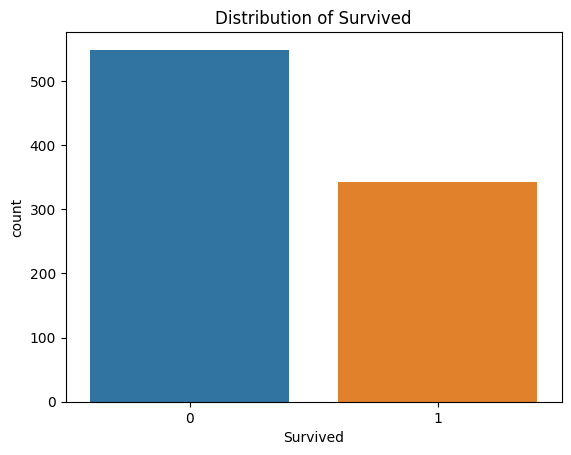

In [16]:
# Visualize the distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survived')
plt.show()

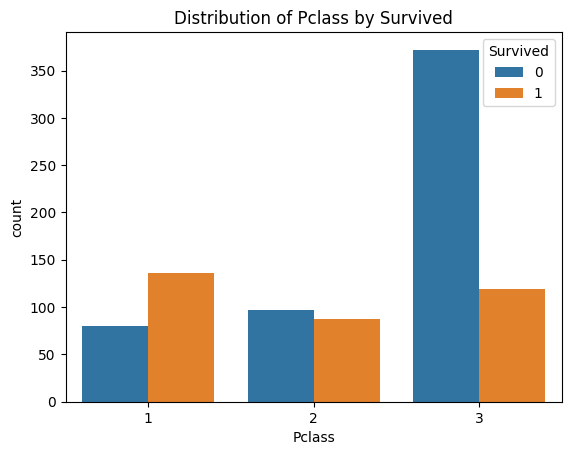

In [17]:
# Visualize the distribution of the 'Pclass' variable by 'Survived'
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Distribution of Pclass by Survived')
plt.show()

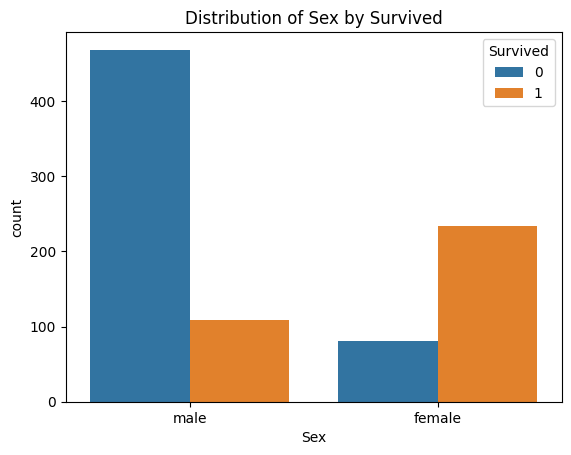

In [18]:
# Visualize the distribution of the 'Sex' variable by 'Survived'
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Distribution of Sex by Survived')
plt.show()

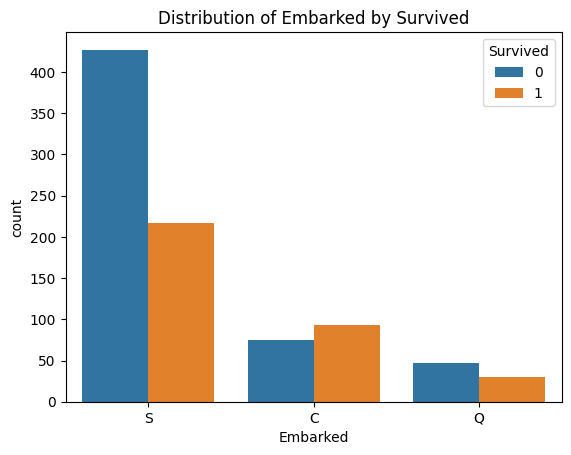

In [19]:
# Visualize the distribution of the 'Embarked' variable by 'Survived'
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Distribution of Embarked by Survived')
plt.show()

<AxesSubplot: >

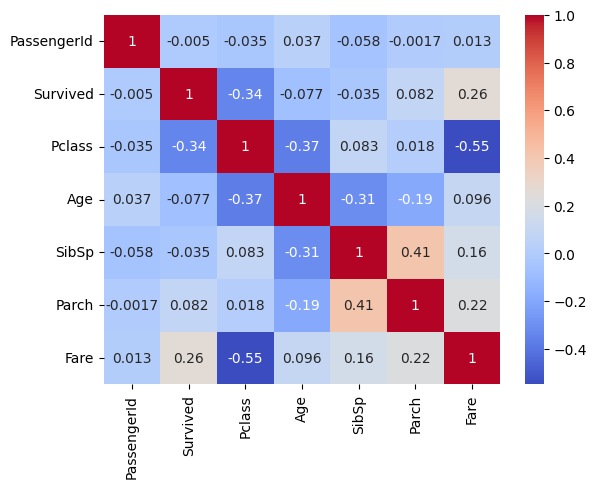

In [20]:
# Exploring the correlation between numerical features
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

## Data Preprocessing

In [21]:
# Function to perform data preprocessing
def preprocess_data(data):
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
    test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
    train_data['FarePerPerson'] = train_data['Fare'] / train_data['FamilySize']
    test_data['FarePerPerson'] = test_data['Fare'] / test_data['FamilySize']

    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    return data

In [22]:
# Preprocess train and test data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

## Checking Missing Values

In [23]:
# Check missing values in the DataFrame
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
FamilySize       0
FarePerPerson    0
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64


In [24]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
FamilySize       0
FarePerPerson    0
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64


In [25]:
# Divide the features and target variable
X = train_data.drop(["Survived"], axis=1)
y = train_data["Survived"]

In [26]:
# Perform Min-Max scaling on the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Split the scaled data into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
# Cross-validation function to evaluate models
def evaluate_model(model, X, y, scoring='accuracy'):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    return cv_scores.mean()

## Hyperparameter tuning using GridSearchCV

In [29]:
def tune_hyperparameters(model, param_grid, X, y, scoring='accuracy'):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
    grid_search.fit(X, y)
    return grid_search.best_estimator_

In [30]:
# Hyperparameter grids for tuning
log_reg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
dt_param_grid = {'max_depth': [None, 5, 10, 15, 20]}
rf_param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 15, 20]}

In [31]:
# Instantiate models with default hyperparameters
log_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

## Hyperparameter tuning for each model

In [32]:
log_reg = tune_hyperparameters(log_reg, log_reg_param_grid, X_train, y_train)
knn = tune_hyperparameters(knn, knn_param_grid, X_train, y_train)
dt = tune_hyperparameters(dt, dt_param_grid, X_train, y_train)
rf = tune_hyperparameters(rf, rf_param_grid, X_train, y_train)

## Ensemble: Voting Classifier

In [33]:
ensemble_models = [('Logistic Regression', log_reg), ('K-Nearest Neighbors', knn), ('Decision Tree', dt), ('Random Forest', rf)]
voting_clf = VotingClassifier(estimators=ensemble_models, voting='hard')

In [34]:
# Fit the voting classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=0.1, max_iter=1000)),
                             ('K-Nearest Neighbors',
                              KNeighborsClassifier(n_neighbors=9)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=5)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50))])

### Evaluation using cross-validation

In [35]:
models = [log_reg, knn, dt, rf, voting_clf]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Voting Classifier']

In [36]:
for i, model in enumerate(models):
    mean_cv_accuracy = evaluate_model(model, X_scaled, y)
    print(f"{model_names[i]} - Cross-Validation Accuracy: {mean_cv_accuracy:.4f}")

Logistic Regression - Cross-Validation Accuracy: 0.7924
K-Nearest Neighbors - Cross-Validation Accuracy: 0.8014
Decision Tree - Cross-Validation Accuracy: 0.7723
Random Forest - Cross-Validation Accuracy: 0.8026
Voting Classifier - Cross-Validation Accuracy: 0.7992


## Final evaluation on the test set

In [37]:
final_predictions = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, final_predictions))

Voting Classifier Accuracy: 0.7988826815642458


## Make predictions on the test set and save results to a CSV file

In [38]:
X_test_scaled = scaler.transform(test_data)
test_data['Survived'] = voting_clf.predict(X_test_scaled)
test_data[['PassengerId', 'Survived']].to_csv('predictions.csv', index=False)